#  MongoDB + Python 실습 (Windows)

이 노트북은 Windows 환경에서 **MongoDB 5.0.29** 버전을 설치하고,
**Python(pymongo)**을 이용해 CRUD, CSV, 이미지, 시각화, Flask 웹까지 실습하는 내용을 담고 있습니다.

---
##  목차
1. MongoDB 설치 및 환경 설정
2. Python 환경 설정
3. MongoDB 연결 테스트
4. CRUD 실습
5. CSV 데이터 저장
6. 이미지 저장과 복원
7. 데이터 시각화
8. 웹 연동

---

## MongoDB 5.0.29 설치 (Windows)

1. [MongoDB Community Download Center](https://www.mongodb.com/try/download/community) 접속
2. Version → 5.0.29, Platform → Windows, Package → MSI
3. 설치 시 **Complete**, **Run MongoDB as a Service** 선택
4. 설치 후 환경변수 추가: `C:\\Program Files\\MongoDB\\Server\\5.0\\bin`

테스트 명령어 (명령 프롬프트):
```bash
mongod --version
mongo --version
```

##  Python 환경 설정

아래 명령어를 실행해 필수 라이브러리를 설치합니다.
```bash
pip install pymongo pandas matplotlib seaborn flask
```

In [1]:
! pip install pymongo pandas matplotlib seaborn flask 

   ---------------------------------------- 0.0/962.6 kB ? eta -:--:--
   ---------------------------------------- 962.6/962.6 kB 10.1 MB/s  0:00:00

   ---------------------------------------- 0/7 [werkzeug]
   ---------------------------------------- 0/7 [werkzeug]
   ---------------------------------------- 0/7 [werkzeug]
   ---------------------------------------- 0/7 [werkzeug]
   ---------------------------------------- 0/7 [werkzeug]
   ---------------------------------------- 0/7 [werkzeug]
   ----- ---------------------------------- 1/7 [itsdangerous]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------- ---------------------------- 2/7 [dnspython]
   ----------

In [7]:
from pymongo import MongoClient

In [9]:
# MongoDB 로컬 서버 연결
client = MongoClient("mongodb://localhost:27017/")

# MongoDB 로컬 서버 연결
client = MongoClient("mongodb://localhost:27017/")

# 데이터베이스 생성 또는 연결  
db = client["testdb"]

# 컬렉션 생성
collection = db["students"]

# 데이터 삽입
collection.insert_one({"name": "홍길동", "age": 23, "major": "컴퓨터공학"})

# 데이터 조회
for doc in collection.find():
    print(doc)

client.close()

{'_id': ObjectId('69114d510173c27e9fac7750'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}


## 기본 CRUD 실습
: CRUD는 Create, Read, Update, Delete의 약자

In [12]:
# DB 생성 및 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students"]

# #Create
# collection.insert_many([
#     {"name": "김철수", "age": 21, "major": "물리학"},
#     {"name": "박민수", "age": 29, "major": "영문학"},
#     {"name": "김소희", "age": 31, "major": "전자공학"},
#     {"name": "우희진", "age": 36, "major": "영문학"},
#     {"name": "여홍철", "age": 28, "major": "체육학"},
#     {"name": "이영희", "age": 22, "major": "수학"}
# ])

# # Update
# collection.update_one({"name": "김철수"}, {"$set": {"age": 45}})

# Delete
collection.delete_one({"name": "이영희"})
collection.delete_one({"name": "김철수"})

# Read
for student in collection.find():
    print(student)

client.close()

{'_id': ObjectId('69114d510173c27e9fac7750'), 'name': '홍길동', 'age': 23, 'major': '컴퓨터공학'}
{'_id': ObjectId('6911507f0173c27e9fac7752'), 'name': '김철수', 'age': 45, 'major': '물리학'}
{'_id': ObjectId('6911507f0173c27e9fac7753'), 'name': '박민수', 'age': 29, 'major': '영문학'}
{'_id': ObjectId('6911507f0173c27e9fac7754'), 'name': '김소희', 'age': 31, 'major': '전자공학'}
{'_id': ObjectId('6911507f0173c27e9fac7755'), 'name': '우희진', 'age': 36, 'major': '영문학'}
{'_id': ObjectId('6911507f0173c27e9fac7756'), 'name': '여홍철', 'age': 28, 'major': '체육학'}
{'_id': ObjectId('6911507f0173c27e9fac7757'), 'name': '이영희', 'age': 22, 'major': '수학'}


## .csv 파일 --> MongoDB
 : Subjects.csv git에서 다운하여 쥬피터파일 경로로 이동

In [13]:
import pandas as pd
from pymongo import MongoClient

In [14]:
# CSV 파일 읽기
df = pd.read_csv("./data/Subjects.csv")
df

,class,name,kor,eng,math,science
0,1,aaa,67,87,90,98
1,1,bbb,45,45,56,98
2,1,ccc,95,59,96,88
3,1,ddd,65,94,89,98
4,1,eee,45,65,78,98
5,1,fff,78,76,98,89
6,2,ggg,87,67,65,56
7,2,hhh,89,98,78,78
8,2,iii,100,78,56,65
9,2,jjj,99,89,87,87


In [15]:
# DB 생성 및 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students_csv"]

# DataFrame을 딕셔너리 리스트로 변환 후 MongoDB에 저장
collection.insert_many(df.to_dict("records")) # DataFrame을 [{}, {}, ...] 형태의 리스트로 변환
print("csv 데이터가 MongoDB에 저장되었습니다.")

# Read
for students_csv in collection.find():
    print(students_csv)

client.close()


csv 데이터가 MongoDB에 저장되었습니다.
{'_id': ObjectId('691159f30173c27e9fac775b'), 'class': 1, 'name': 'aaa', 'kor': 67, 'eng': 87, 'math': 90, 'science': 98}
{'_id': ObjectId('691159f30173c27e9fac775c'), 'class': 1, 'name': 'bbb', 'kor': 45, 'eng': 45, 'math': 56, 'science': 98}
{'_id': ObjectId('691159f30173c27e9fac775d'), 'class': 1, 'name': 'ccc', 'kor': 95, 'eng': 59, 'math': 96, 'science': 88}
{'_id': ObjectId('691159f30173c27e9fac775e'), 'class': 1, 'name': 'ddd', 'kor': 65, 'eng': 94, 'math': 89, 'science': 98}
{'_id': ObjectId('691159f30173c27e9fac775f'), 'class': 1, 'name': 'eee', 'kor': 45, 'eng': 65, 'math': 78, 'science': 98}
{'_id': ObjectId('691159f30173c27e9fac7760'), 'class': 1, 'name': 'fff', 'kor': 78, 'eng': 76, 'math': 98, 'science': 89}
{'_id': ObjectId('691159f30173c27e9fac7761'), 'class': 2, 'name': 'ggg', 'kor': 87, 'eng': 67, 'math': 65, 'science': 56}
{'_id': ObjectId('691159f30173c27e9fac7762'), 'class': 2, 'name': 'hhh', 'kor': 89, 'eng': 98, 'math': 78, 'science': 7

## 이미지 --> MongoDB에 저장

In [16]:
import base64
from io import BytesIO
from pymongo import MongoClient

In [28]:
# 이미지 읽기
with open("./data/cat.jpg", "rb") as img_file:
    encoded = base64.b64encode(img_file.read()).decode("utf-8")

# DB 생성 및 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["images"]

# MongDB에 저장
collection.insert_one({"filename": "cat.jpg", "data": encoded})

# 이미지 다시 불러오기
img_data = collection.find_one({"filename": "cat.jpg"})["data"]

# base64 -> 바이너리 변환 -> 이미지 객체로 변환
with open("restored_cat.jpg", "wb") as out_file:
    out_file.write(base64.b64decode(img_data))

print("이미지를 MongoDB에서 불러와 복원했습니다.")




이미지를 MongoDB에서 불러와 복원했습니다.


In [27]:
client.close()

## MongoDB --> 이미지 읽어와 출력

MongoDB에서 이미지를 성공적으로 불러왔습니다.


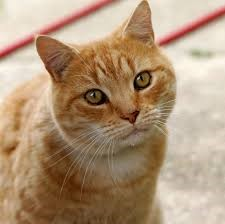

In [29]:
import base64
from io import BytesIO
from PIL import Image
from pymongo import MongoClient
from IPython.display import display

# MongoDB에서 이미지 데이터 가져오기
document = collection.find_one({"filename": "cat.jpg"})
if document:
    img_data = document["data"]
    # base64 → 바이너리 변환
    img_binary = base64.b64decode(img_data)
    # 메모리에서 바로 이미지 객체 생성
    img = Image.open(BytesIO(img_binary))
    print("MongoDB에서 이미지를 성공적으로 불러왔습니다.")
    display(img)
else:
    print("cat.jpg 문서를 찾을 수 없습니다.")

client.close()


## 퀴즈1

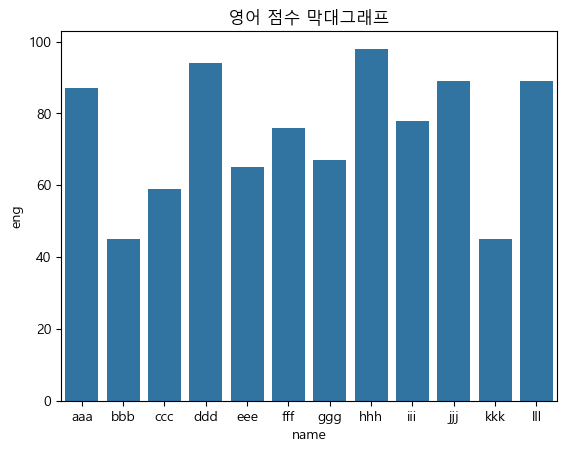

In [30]:
# 퀴즈1 빈칸 채우기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from pymongo import MongoClient

# -----------------------------
# 한글 폰트 설정 (Windows)
# -----------------------------
# Windows 기본 폰트: Malgun Gothic
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 값 표시 문제 방지
plt.rcParams['axes.unicode_minus'] = False


# 작성하기------------------------------------------------------------------------------

client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students_csv"]

# MongoDB → DataFrame
data = pd.DataFrame(list(collection.find({}, {"_id": 0})))

#------------------------------------------------------------------------------

# 시각화
sns.barplot(data=data, x="name", y="eng")
plt.title("영어 점수 막대그래프")
plt.show()

#작성하기------------------------------------------------------------------------
client.close()


## 퀴즈2

  name  age  major
0  홍길동   23  컴퓨터공학
1  김철수   45    물리학
2  박민수   29    영문학
3  김소희   31   전자공학
4  우희진   36    영문학
5  여홍철   28    체육학
6  이영희   22     수학


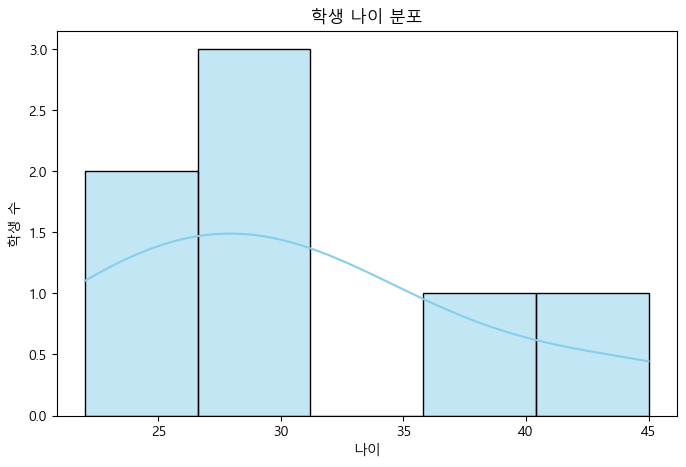

C:\Users\human\AppData\Local\Temp\ipykernel_2808\1097098403.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="major", data=df, palette="pastel")


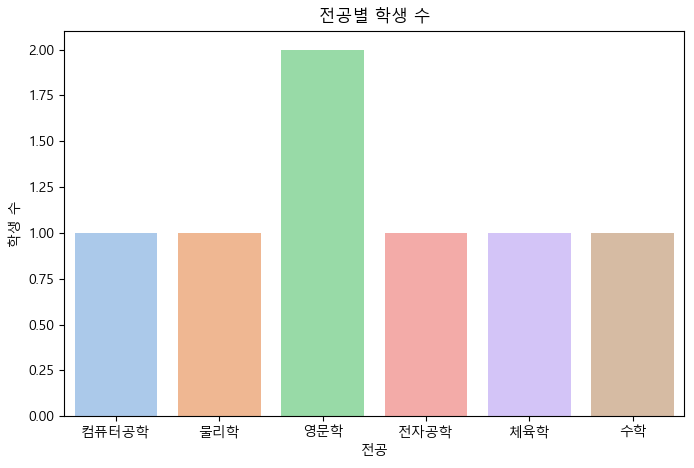

C:\Users\human\AppData\Local\Temp\ipykernel_2808\1097098403.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="major", y="age", data=df, palette="Set2")


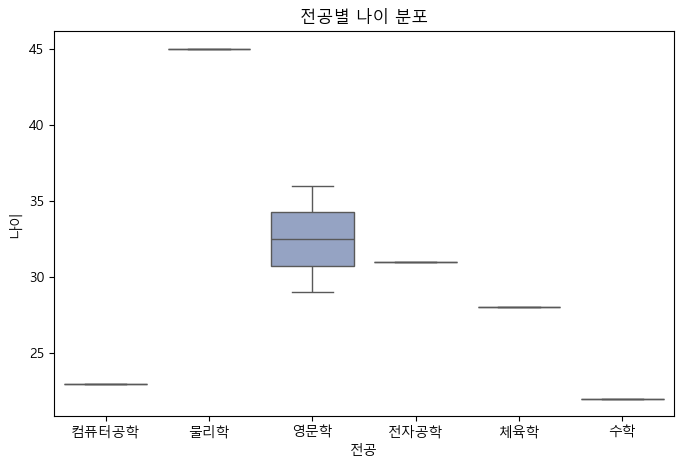

In [31]:
# 퀴즈3

from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# -----------------------------
# 한글 폰트 설정 (Windows)
# -----------------------------
# Windows 기본 폰트: Malgun Gothic
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 음수 값 표시 문제 방지
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# MongoDB 연결 및 데이터 불러오기
# -----------------------------
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students"]

cursor = collection.find({})
df = pd.DataFrame(list(cursor))
client.close()

# _id 컬럼 제거
if "_id" in df.columns:
    df = df.drop("_id", axis=1)

print(df)

# -----------------------------
#  나이 분포 히스토그램
# -----------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=5, kde=True, color="skyblue")
plt.title("학생 나이 분포")
plt.xlabel("나이")
plt.ylabel("학생 수")
plt.show()

# -----------------------------
#  전공별 학생 수 막대그래프
# -----------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x="major", data=df, palette="pastel")
plt.title("전공별 학생 수")
plt.xlabel("전공")
plt.ylabel("학생 수")
plt.show()

# -----------------------------
#  전공별 나이 분포 박스플롯
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x="major", y="age", data=df, palette="Set2")
plt.title("전공별 나이 분포")
plt.xlabel("전공")
plt.ylabel("나이")
plt.show()


## 퀴즈3 

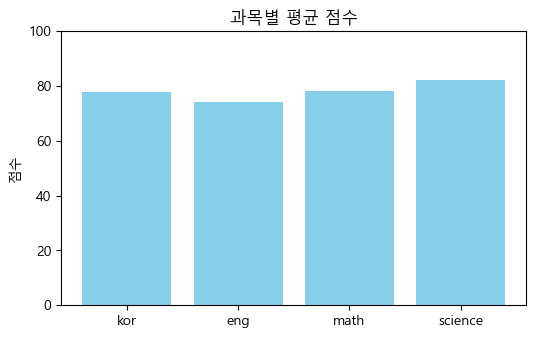

In [32]:
import tkinter as tk
from tkinter import ttk
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# MongoDB 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["testdb"]
collection = db["students_csv"]

# 데이터 불러오기
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

# Tkinter 메인 윈도우
root = tk.Tk()
root.title("학생 점수 대시보드")
root.geometry("900x700")

# === 제목 ===
title_label = tk.Label(root, text="학생 점수 대시보드", font=("Malgun Gothic", 18, "bold"))
title_label.pack(pady=10)

# === Treeview 테이블 ===
frame_table = tk.Frame(root)
frame_table.pack(pady=10)

columns = list(df.columns)
tree = ttk.Treeview(frame_table, columns=columns, show="headings", height=10)

# 컬럼 헤더 설정
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=100, anchor="center")

# 데이터 삽입
for _, row in df.iterrows():
    tree.insert("", "end", values=list(row))

tree.pack()

# === Matplotlib 그래프 표시 ===
frame_graph = tk.Frame(root)
frame_graph.pack(pady=20)

# 과목별 평균 계산
mean_scores = df[["kor", "eng", "math", "science"]].mean()

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(mean_scores.index, mean_scores.values, color="skyblue")
ax.set_title("과목별 평균 점수")
ax.set_ylabel("점수")
ax.set_ylim(0, 100)

# Tkinter에 matplotlib 그래프 추가
canvas = FigureCanvasTkAgg(fig, master=frame_graph)
canvas.draw()
canvas.get_tk_widget().pack()

# === 종료 버튼 ===
exit_button = tk.Button(root, text="닫기", command=root.destroy, font=("Malgun Gothic", 12))
exit_button.pack(pady=10)

# Tkinter 실행
root.mainloop()
